In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

# 대화형 시각화 기능
%matplotlib notebook

# Ch9. 그래프와 시각화

## 9.1. matplotlib API 간략하게 살펴보기

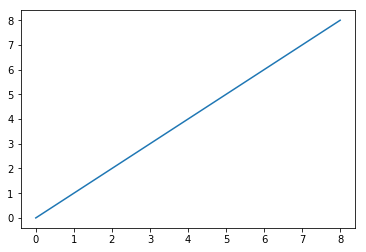

In [2]:
data = np.arange(9)
plt.plot(data)

### 9.1.1. figure 와 서브플롯  
plt에서 그래프는 figure 객체내에 존재함

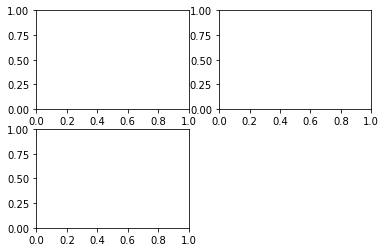

In [3]:
fig = plt.figure()
#add_subplot을 사용해서 최소 하나이상의 subplots를 생성해야함
ax1 = fig.add_subplot(2,2,1) #fig 가 2x2이고 그중 첫번쨰 서브플롯을 선택하겠다
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3)

주피터 노트북을 사용할때에는 실행되는 셀마다 그래프가 리셋되므로 복잡한 그래프를 그릴떄는 단일 셀에 전부입력해야함

In [4]:
#plt.plot([1.5,3.5,-2,1.6]) #가장 최근의 fig롸 subplot에 그림, 만약 subplot이 없다면 하나생성

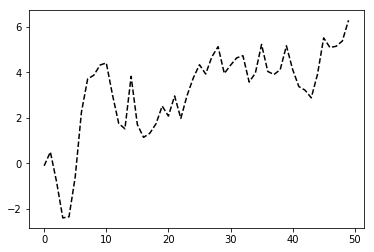

In [5]:
plt.plot(np.random.randn(50).cumsum(),'k--')

fig.add_subplot에서 AxesSubplot객체 반환되므로 각각의 인스턴스 메서드를 이용하면 서브플롯에 그림 그릴수 있음

In [6]:
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha = 0.3)

In [7]:
ax2.scatter(np.arange(30),np.arange(30)+3 * np.random.randn(30))

특정 배치에 맞게 여러개의 서브플롯을 포함하는 fig 생성하는 경우를 위해 plt.subplots존재

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D131A51CC0>,
      dtype=object)

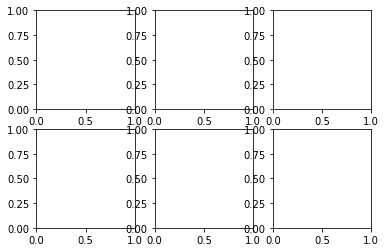

In [8]:
fig, axes = plt.subplots(2,3)
axes

**서브플롯 간의 간격 조절하기**

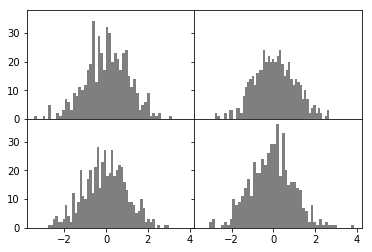

In [9]:
#subplots_adjust로 간격 안주고 생성
fig, axes = plt.subplots(2,2,sharex=True,sharey =True)
for i in range(2):
    for j in range(2):
        _ = axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha = 0.5)
plt.subplots_adjust(wspace= 0 ,hspace=0)

### 9.1.2. 색상, 마커, 선스타일

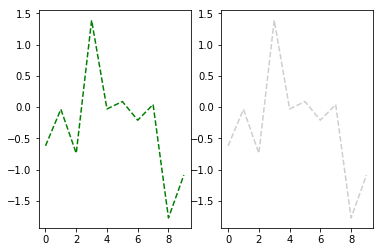

In [10]:
fig,ax = plt.subplots(1,2)
x = np.arange(10)
y = np.random.randn(10)
ax[0].plot(x,y,'g--')
ax[1].plot(x,y,linestyle = '--',color='#CECECE')#'g') #명시적 스타일, RGB 직접 입력 가능

마커 추가하기  
색상 - 마커 - 선스타일 순서

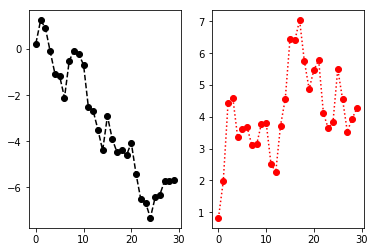

In [11]:
from numpy.random import randn as rn
fig ,ax = plt.subplots(1,2)
ax[0].plot(rn(30).cumsum(),'ko--')
ax[1].plot(rn(30).cumsum(),color='r',linestyle=':',marker='o')

drawstyle 옵션

C:\Users\sorkt\Anaconda3\lib\site-packages\matplotlib\legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


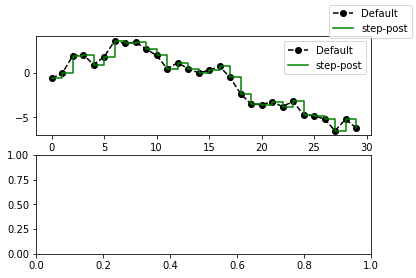

In [12]:
fig ,ax = plt.subplots(2)
data = np.random.randn(30).cumsum()
ax[0].plot(data,'ko--',label='Default')
ax[0].plot(data,'g-',label='step-post',drawstyle = 'steps-post')
ax[0].legend(loc='best')#'lower right')
fig.legend(loc='best')#'lower right')

### 9.1.3. 눈금,라벨, 범례  
그래프를 꾸미는 방법은 두가지  
1. pyplot 인터페이스를 사용해서 순차적으로 꾸미기  
2. matplotlib의 API를 사용해서 객체지향적으로 꾸미기  

pyploy 인터페이스는 xlim등 메서드로 이루어져있는데 현재 활성화된 혹은 가장 최근 Subplot에 동작함  
서브플롯 객체의 set/get 메서드로도 존재하는데 동작은 같지만 이게더 명시적임 (set_xlim)

**제목, 축, 눈금, 눈금이름 설정하기**

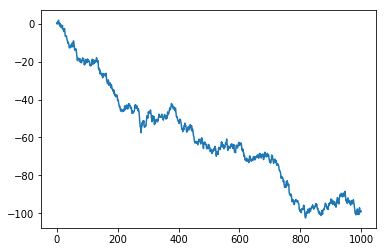

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

set_xticks, set_xticklabels

In [14]:
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(list('abcdef'),rotation = 30,fontsize='small')

In [15]:
ax.set_title('My subplot')
ax.set_xlabel('Stages')


Text(0.5, 1.0, 'My subplot')

Text(0.5, 3.1999999999999993, 'Stages')

axes 클래스는 플롯의 속성을 설정할수 있도록 set 메서드를 제공함

In [16]:
props = {
    'title':'title !!!',
    'xlabel':'X lable'
}
ax.set(**props)

[Text(0.5, 3.1999999999999993, 'X lable'), Text(0.5, 1.0, 'title !!!')]

**범례 추가하기**

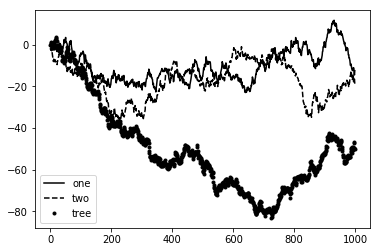

In [17]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='tree')
plt.legend()

### 9.1.4 주석과 그림 추가하기  
text,arrow,annotate 함수를 사용해 추가  
- text : 주어진 좌표에 부가적인 스타일로 글자를 그려줌

Text(1, 1, 'Hi!')

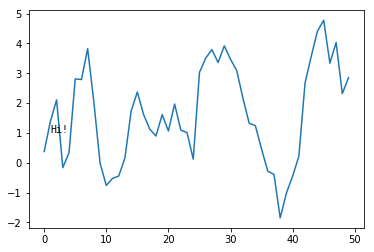

In [18]:
fig = plt.figure();ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(50).cumsum())
ax.text(1,1,'Hi!',family='monospace',fontsize=10)

Text(2007-10-11 00:00:00, 1779.41, 'Peak of Bull market')

Text(2008-03-12 00:00:00, 1533.77, 'Bear Stearns Fails')

Text(2008-09-15 00:00:00, 1417.7, 'Lehman Bankruptcy')

(732677.0, 734138.0)

(600, 1800)

Text(0.5, 1.0, 'Financial crisis')

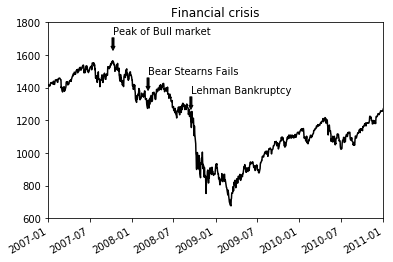

In [19]:
from datetime import datetime
fig = plt.figure();ax = fig.add_subplot(1,1,1)

data = pd.read_csv('Datas/spx.csv',index_col = 0,parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax,style='k-')


#위기상황 좌표
crisis_data = [
    (datetime(2007,10,11),'Peak of Bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label, xy = (date,spx.asof(date)+75),
               xytext = (date,spx.asof(date)+225),
               arrowprops = dict(facecolor='black',headwidth=4,width=2,headlength=4),
               horizontalalignment = 'left',
               verticalalignment = 'top')
#구간 확대
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])

ax.set_title('Financial crisis')

**도형그리기**  
- 일반적인 도형을 표현하기 위해 patches 객체를 제공함  
- Rectangle, Circle등은 pyplot에서도 찾을수 있지만, 전체 모음은 matplotlib.pathes에 있음  
- pathes 객체인 shp를 만들고 서브플롯에 ax.add_patch(shp)를 호출

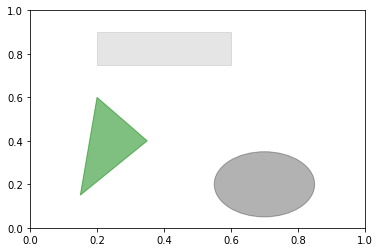

In [20]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha =0.1)
circ = plt.Circle((0.7, 0.2),0.15,color='k',alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],[0.35,0.4],[0.2,0.6]],color = 'g',alpha = 0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5. 그래프를 파일로 저장하기  
- plt.savefig or figure의 savefig 메서드
- dpi : 인치당 도트 해상도  
- bbox_inches : 실제 둘레의 공백을 잘라냄

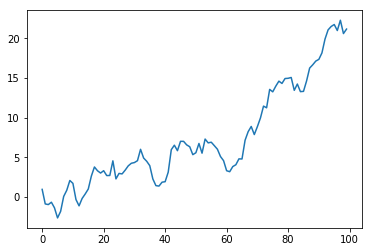

In [21]:
fig ,axe = plt.subplots(1,1)
axe.plot(np.random.randn(100).cumsum())
plt.show()

In [22]:
fig.savefig('fig.png',dpi=400,bbox_inches='tight')

savefig 메서드는 파일뿐 아니라 ByteIO처럼 파일과 유사한 객체에 저장도 할수있음

In [23]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### 9.1.6 matplotlib 설정  
- rc메서드를 이용해서 설정하거나  
- mpl-data디렉토리에 matplotlibrc 파일을 변경하면됨  

In [45]:
#fig size10x10으로 고정
plt.rc('figure',figsize=(5,5)) #컴포넌트이름, 키워드인자

#사전형식으로 작성하면 편함
font_options={
    'family':'monospace',
    'weight':'bold',
    'size':10
}
plt.rc('font',**font_options)

## 9.2. pandas에서 seaborn으로 그래프 그리기

### 9.2.1 선그래프

0     0.616948
10   -0.493694
20   -0.987947
30   -0.638553
40   -2.673876
50   -2.345396
60   -3.496117
70   -5.250022
80   -6.806868
90   -5.719467
dtype: float64

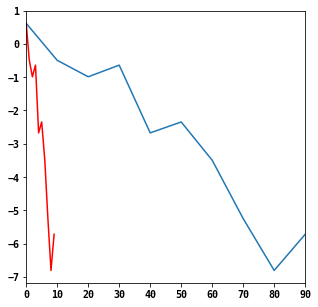

In [49]:
s = pd.Series(np.random.randn(10).cumsum(),index = np.arange(0,100,10))
s
s.plot()
s.plot(use_index=False,color='r') #인덱스가 x축으로 사용되는걸 막음

pandas 그래프 메서드는 ax인자를 받는데 서브플롯 객체를 받음  
DataFrame의 plot 메서드는 하나의 서브플롯 안에 각 컬럼별로 선 그래프를 그리고 범례를 생성함

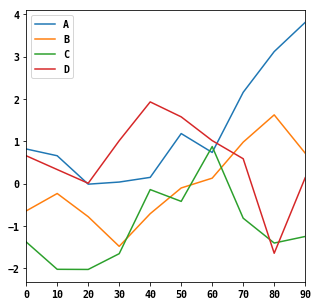

In [54]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(axis=0),columns = ['A','B','C','D'],
                 index = np.arange(0,100,10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D13488D2B0>,
      dtype=object)

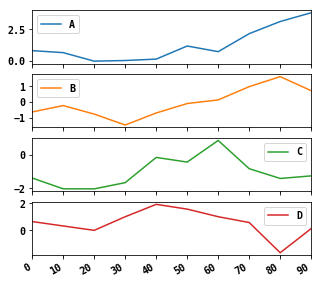

In [60]:
df.plot(subplots=True)

### 9.2.2 막대그래프

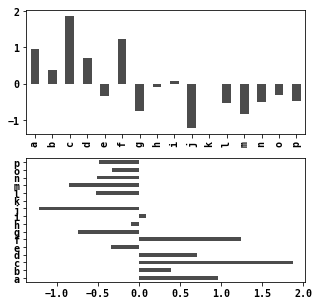

In [62]:
fig,axes=plt.subplots(2,1)
data = pd.Series(np.random.randn(16),index = list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha = 0.7)
data.plot.barh(ax=axes[1], color='k', alpha = 0.7)

막대그래프를 그릴때 Series의 value_counts메서드를 이용하면 유용하다.

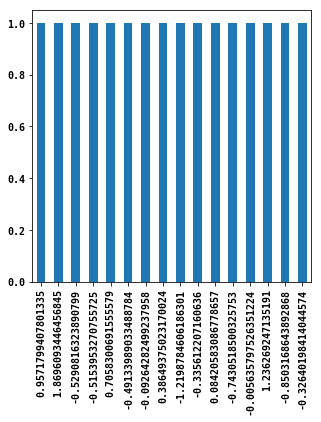

In [64]:
dat = data.value_counts()
dat.plot.bar()

DataFrame에서 막대그래프는 하나의 로우를 묶어서 그룹마다 각각의 막대를 보여줌

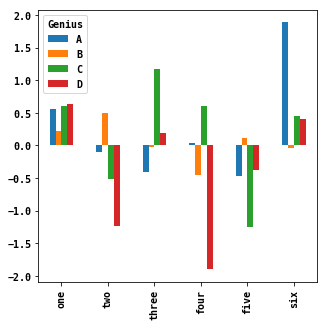

In [69]:
df = pd.DataFrame(np.random.randn(6,4),
                 index=['one','two','three','four','five','six'],
                 columns = pd.Index(['A','B','C','D'],name='Genius'))
df.plot.bar()

stacked = True를 주면 누적 막대그래프가 됨

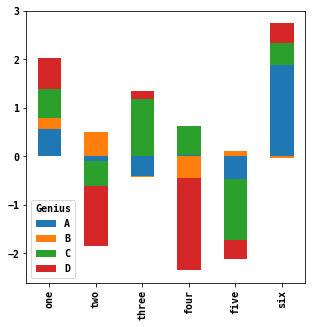

In [70]:
df.plot.bar(stacked=True)

팁데이터 : 파티숫자대비 팁 비율 보기

In [73]:
tips = pd.read_csv('Datas/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [75]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [76]:
#1인, 6인 파티 제외
party_counts = party_counts.loc[:,2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


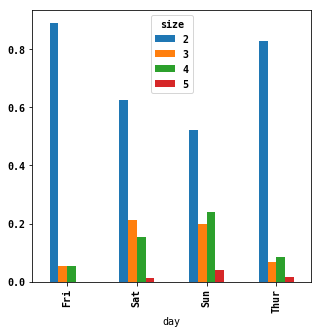

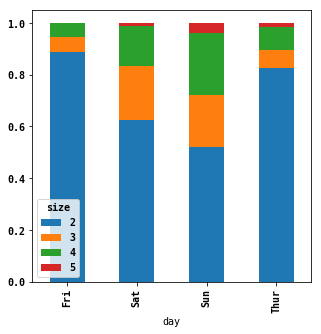

In [83]:
#각 로우의 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(axis=1),axis=0)
party_pcts.plot.bar()
party_pcts.plot.bar(stacked=True)

주말이 될수록 파티 규모가 커짐

그래프를 그리기전에 요약을 해야하는 데이터는 seaborn 패키지를 이용하면 훨씬 간단하다.

In [84]:
import seaborn as sns

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


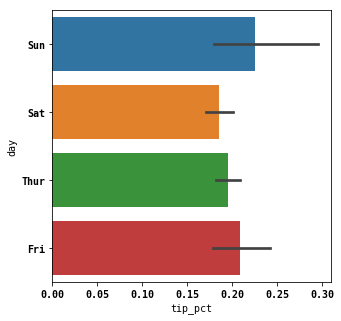

In [86]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

seaborn 플로팅 함수의 data인자는 dataframe을 받고, 다른 인자들은 컬럼 이름을 참조  
자동으로 평균값을 이용해서 그림을 그림, 막대그래프는 95% 신뢰구간  

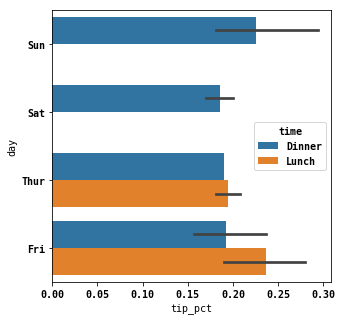

In [91]:
# hue 옵션을 이용하면 세부 분류가능
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h')

스타일을 변경 하려면 seaborn.set() 메서드를 이용  
ex> sns.set(style='whitegrid')

### 9.2.3. 히스토그램과 밀도 그래프

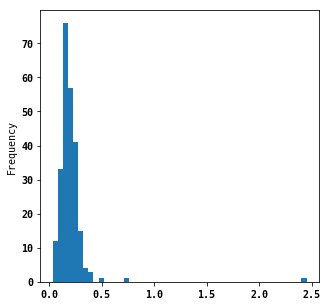

In [92]:
tips['tip_pct'].plot.hist(bins=50)

히스토그램과 비슷한 그래프로 밀도 그래프가 있음,  
관찰값을 이용해서 추정되는 연속 확률분포를 그림  
일반적으로 kernel 메서드를 잘 섞어서 분포를 근사하지만 밀도 그래프는 단순 정규 분포로 그림  
KDE(Kernel Density Estimate)그래프라고도 알려져 있음

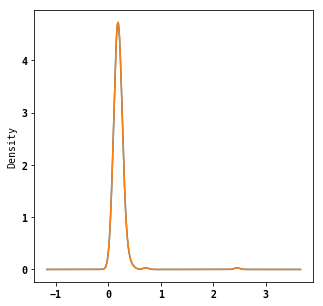

In [96]:
tips['tip_pct'].plot.kde()
tips['tip_pct'].plot.density()

seaborn의 distplot을 이용해서 두개를 한번에 그릴수 있음  
두개의 다른 정규분포로 이루어진 양봉분포(bimodal distribution)를 예시로 들면

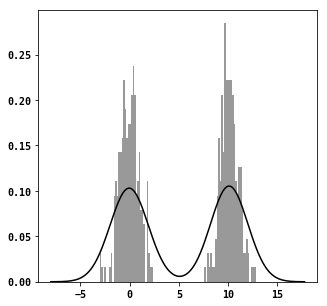

In [97]:
comp1 = np.random.normal(0,1,size= 200)
comp2 = np.random.normal(10,1,size= 200)
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='k')